See the first version of this notebook [here](https://github.com/rajewsky-lab/planarian_lineages/blob/1741fc376574393980b7976b764ccdd536615150/graph_abstraction/epidermal-lineage.ipynb).

# Planaria lineages: the epidermal lineage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.0.3 anndata==0.5.8 numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata_full = sc.read('./data/dge.txt', cache=True).T

... reading from cache file ./cache/data-dge.h5ad


This data has already been logarithmized.

In [4]:
adata_full

AnnData object with n_obs × n_vars = 21612 × 28065 

## Pseudotime series

Let us use some marker genes for clusters obtained using Seurat.

In [5]:
markers = pd.read_csv('./data/epidermal_lineage.top10.markers.txt', sep='\t')
epidermal_markers = markers['gene'].values

In [6]:
adata = sc.read('./write/planaria.h5ad')

In [7]:
adata_full.obs = adata.obs
adata_full.uns['clusters_colors'] = adata.uns['clusters_colors']

In [8]:
path = ['neoblast 1',
        'epidermal neoblasts', 'early epidermal progenitors',
        'late epidermal progenitors 1',
        'late epidermal progenitors 2', 'epidermis']

There is significant overlap in all stages of the epidermal lineage except for the last - the transition to the epidermis cluster seems disconnected.


Only the following markers seem to be connecting the late epidermal progenitors with the epidermis:     'dd_Smed_v6_80_0', 'dd_Smed_v6_146_0', 'dd_Smed_v6_2178_0', 'dd_Smed_v6_18_0'

This heatmap looks slightly different than in the supplemental material as the final dge matrix uploaded to the psca webpages was logarithmized with respect to basis 2. For the supplemental figure, we used a natural logarithm.

saving figure to file ./figures/paga_path_epidermal.png


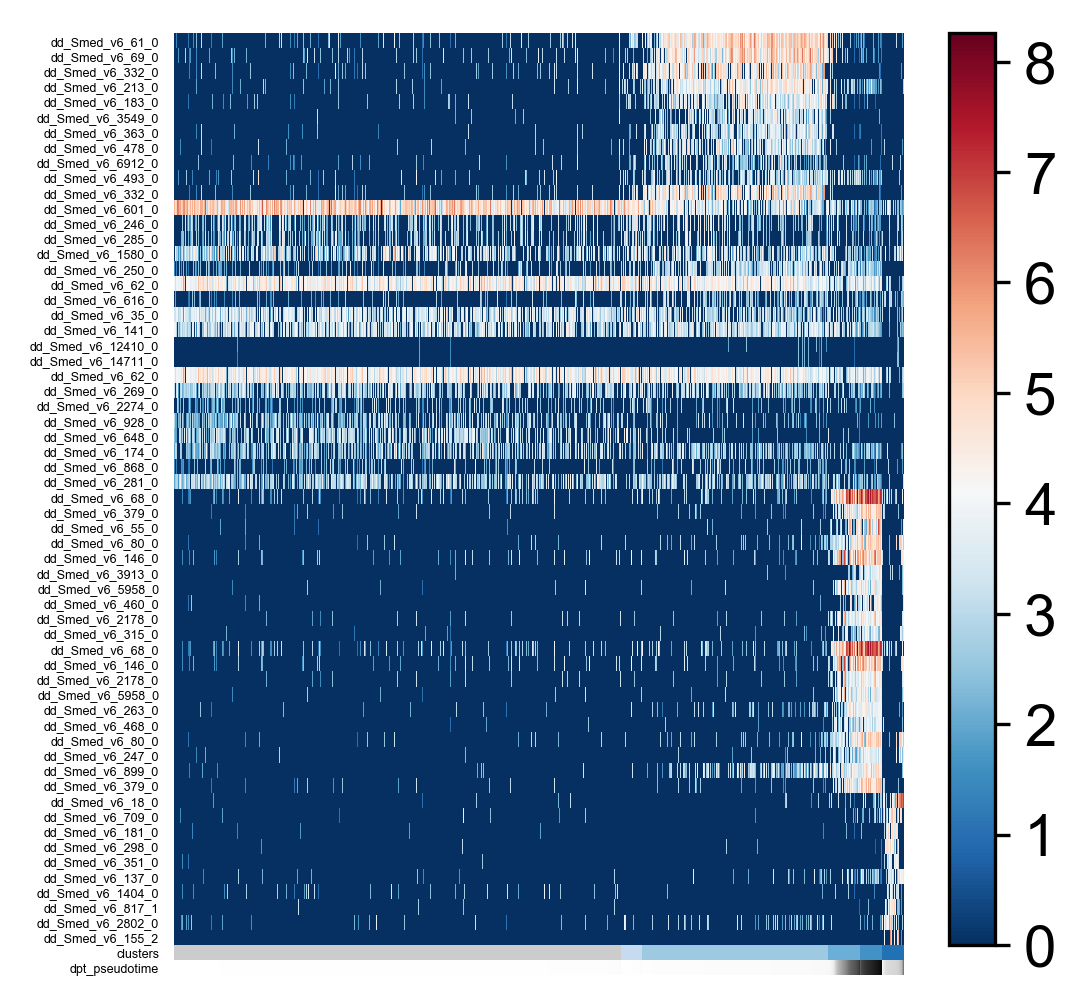

In [9]:
sc.pl.paga_path(adata_full, path, epidermal_markers, groups_key='clusters', show_node_names=False, ytick_fontsize=3, save='_epidermal')

## PAGA

In [10]:
epidermal_markers = np.unique(epidermal_markers)

In [11]:
adata_epidermal = adata_full[:, epidermal_markers]

In [12]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 21612 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [13]:
epidermal_clusters = [
    'epidermal neoblasts',
    'early epidermal progenitors',
    'late epidermal progenitors 1',
    'late epidermal progenitors 2', 'epidermis']

In [14]:
adata_epidermal = adata_epidermal[
    adata_full.obs['clusters'].isin(
        epidermal_clusters)]

Now, we're left with only 4009 cells.

In [15]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 4009 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [16]:
sc.tl.tsne(adata_epidermal, n_pcs=0)

computing tSNE
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:31.01)


In [17]:
sc.settings.set_figure_params(dpi=80)

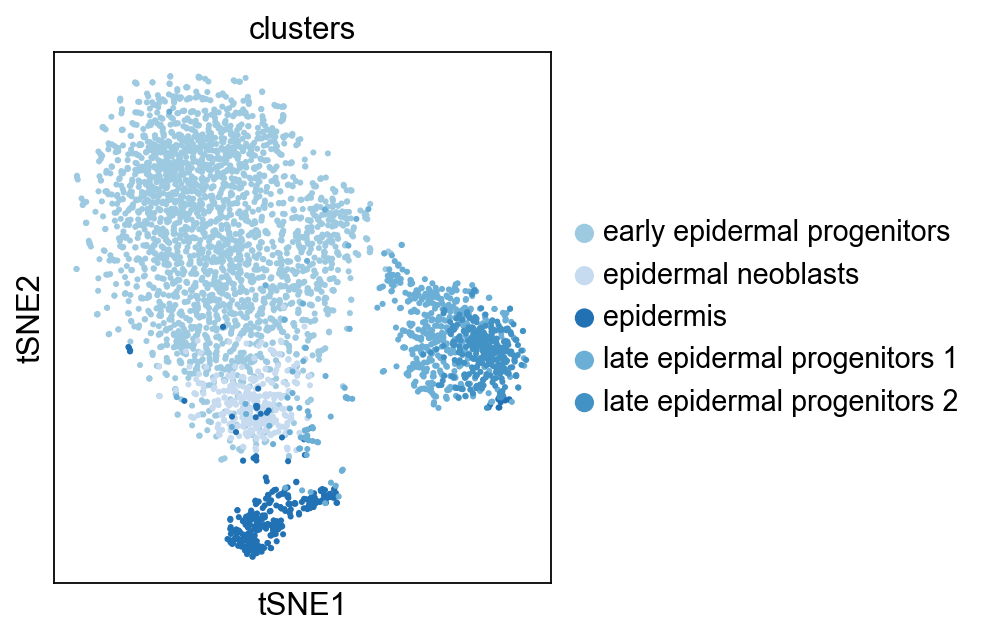

In [18]:
sc.pl.tsne(adata_epidermal, color='clusters')

In [19]:
sc.pp.neighbors(adata_epidermal, n_neighbors=5, n_pcs=0)

computing neighbors
    finished (0:00:02.92)


In [20]:
sc.tl.paga(adata_epidermal, groups='clusters')

running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` 
    finished (0:00:00.11)


Both tSNE and abstracted graph look slightly different because of the changed final DGE matrix, but represent essentially the same results.

saving figure to file ./figures/paga_compare_epidermal.png


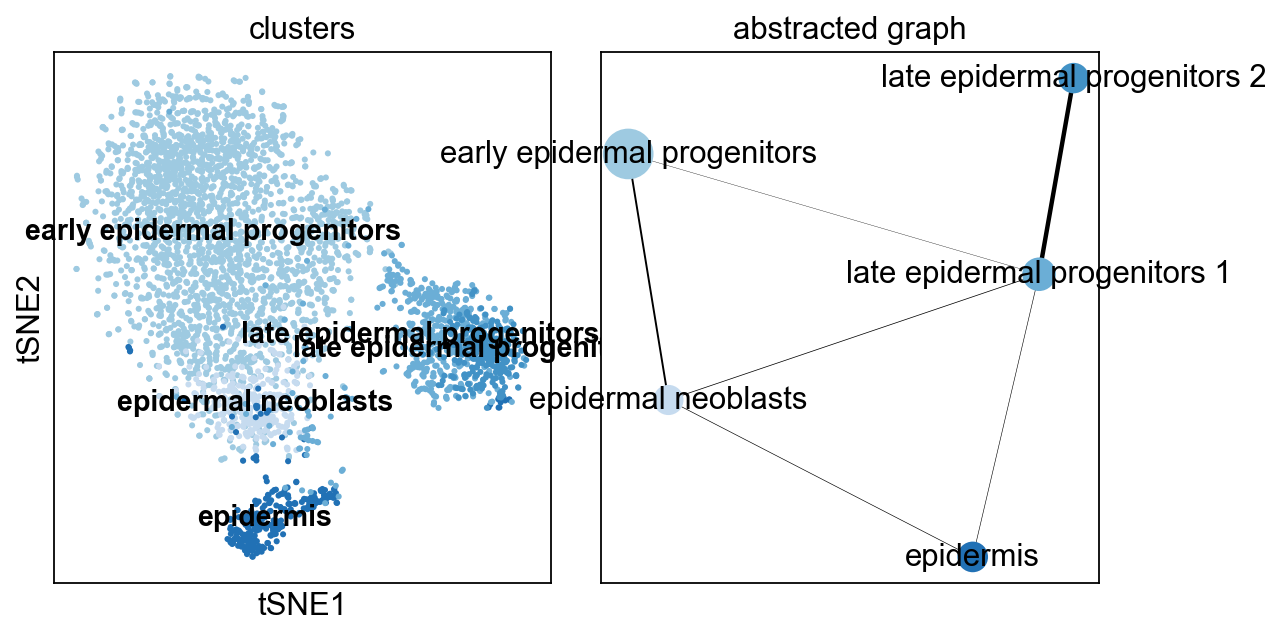

In [21]:
sc.pl.paga_compare(adata_epidermal, threshold_solid=0.02, save='_epidermal')

In [22]:
adata_epidermal.obs['clusters'].cat.categories.values

array(['early epidermal progenitors', 'epidermal neoblasts', 'epidermis',
       'late epidermal progenitors 1', 'late epidermal progenitors 2'], dtype=object)

In [23]:
adata_epidermal.uns['paga']['confidence'].toarray()

array([[ 0.        ,  0.11606296,  0.00638533,  0.02084175,  0.        ],
       [ 0.11606296,  0.        ,  0.03896512,  0.04403117,  0.        ],
       [ 0.00638533,  0.03896512,  0.        ,  0.03471209,  0.01359337],
       [ 0.02084175,  0.04403117,  0.03471209,  0.        ,  0.26586406],
       [ 0.        ,  0.        ,  0.01359337,  0.26586406,  0.        ]])

In [24]:
adata_epidermal.uns['paga']['connectivities'].toarray()

array([[   0.,  510.,   29.,  115.,    0.],
       [ 510.,    0.,   59.,   81.,    0.],
       [  29.,   59.,    0.,   66.,   21.],
       [ 115.,   81.,   66.,    0.,  499.],
       [   0.,    0.,   21.,  499.,    0.]])